<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/Implementa%C3%A7%C3%A3o_Matricial_da_DFT_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Criando funções

In [177]:
def dft_matrix(N):
    """Cria a matriz DFT de tamanho N x N."""
    n = np.arange(N)
    k = n.reshape((N, 1))
    omega = np.exp(-2j * np.pi * k * n / N)
    return omega

def dft(signal):
    """Calcula a DFT de um array 1D usando o método matricial."""
    N = len(signal)
    F = dft_matrix(N)
    return np.dot(F, signal)

# Definindo o sinal aleatório qualquer de entrada como um vetor básico

In [178]:
signal_base = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

# 'num_repetitions' é definido como 64. Isso significa que queremos repetir o signal_base 64 vezes para criar um sinal mais longo.

In [179]:
# Aumentando o número de pontos no sinal de entrada
num_repetitions = 64  # Por exemplo, repetir o vetor 64 vezes para obter 1024 pontos

# np.tile(signal_base, num_repetitions) usa a função np.tile do NumPy para repetir o vetor signal_base 64 vezes, criando um novo vetor extended_signal que é 64 vezes mais longo que o signal_base. Isso resulta em um vetor de 1024 pontos (16 * 64).

In [180]:
extended_signal = np.tile(signal_base, num_repetitions)

# Criando um senoide

In [181]:
# Criando uma senoide distorcida
fs = 1000  # Frequência de amostragem
t = np.arange(len(extended_signal)) / fs  # Vetor de tempo
sine_wave = np.sin(2 * np.pi * 60 * t)  # Senoide de 60 Hz

# Modulação para distorcer a senoide
distorced_sine_wave = sine_wave * extended_signal

dft_result = dft(distorced_sine_wave)  # Calcula a DFT do sinal distorcido

In [182]:
print(dft_result)

[-32.11138743 +0.j         -38.28890116 -6.4155527j
 -85.85328275-27.88277716j ...  94.115011  -43.59812953j
 -85.85328275+27.88277716j -38.28890116 +6.4155527j ]


# Plotando os gráficos

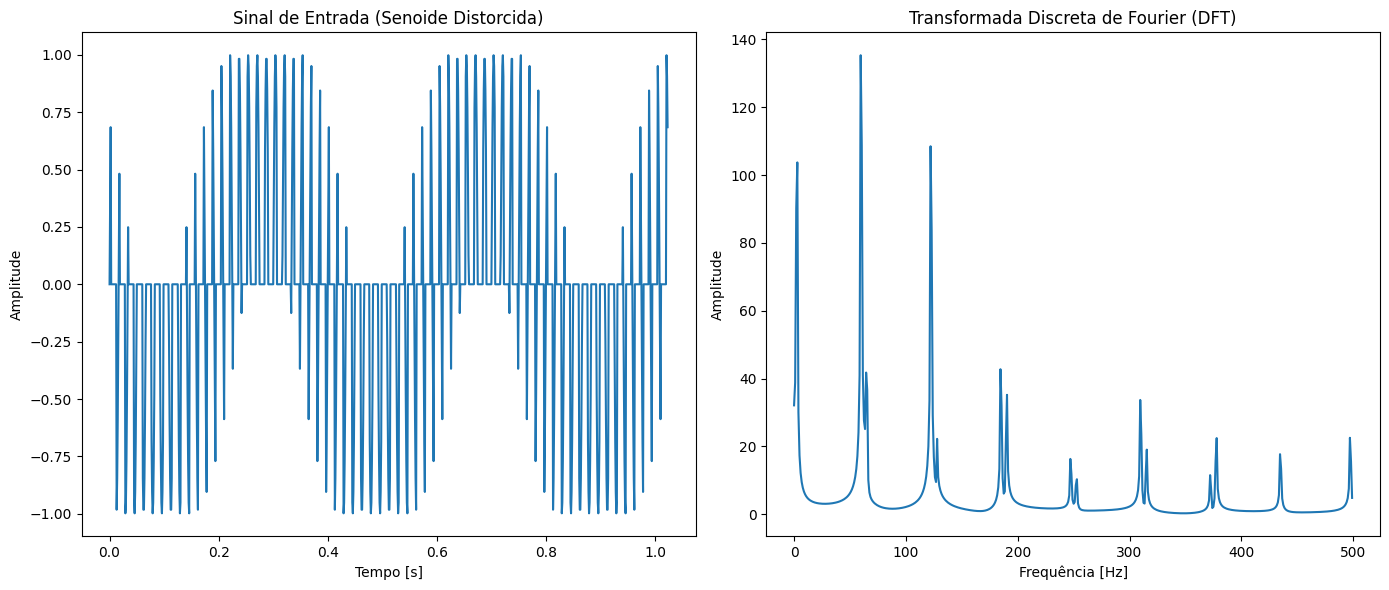

In [183]:
# Plotando o sinal de entrada no tempo
plt.figure(figsize=(14, 6))

# Primeiro subplot: sinal de entrada no tempo
plt.subplot(1, 2, 1)
plt.plot(t, distorced_sine_wave)
plt.title('Sinal de Entrada (Senoide Distorcida)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

# Segundo subplot: módulo da DFT (magnitude das componentes de frequência)
frequencies = np.fft.fftfreq(len(distorced_sine_wave), 1/fs)  # Calcula as frequências correspondentes
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(dft_result)[:len(frequencies)//2])  # Plota a magnitude da DFT
plt.title('Transformada Discreta de Fourier (DFT)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


[6.        +0.j         5.99732699-0.13485926j 5.98931273-0.26949436j ...
 5.97597143+0.40368155j 5.98931273+0.26949436j 5.99732699+0.13485926j]


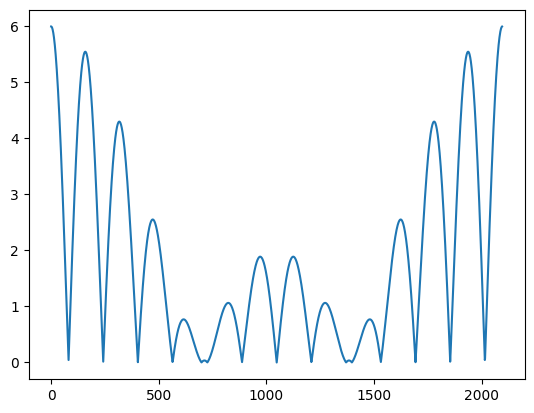

In [187]:
signal_base = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])
fourier_signal_base = np.fft.fft(signal_base, 2096)

print(fourier_signal_base)

plt.plot(np.abs(fourier_signal_base))